# Unsupervised learning - PCA and clustering 

## Exploring the data

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

usArrests_df = pd.read_csv("UsArrests.csv")
usArrests_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.20,236,58,21.20
1,Alaska,10.00,263,48,44.50
2,Arizona,8.10,294,80,31.00
3,Arkansas,8.80,190,50,19.50
4,California,9.00,276,91,40.60


In [11]:
print('Number of cases: {} Number of features: {}'.format(usArrests_df.shape[0],usArrests_df.shape[1]))

Number of cases: 50 Number of features: 5


We then need to summarise the statistical properties of the columns:

In [12]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = usArrests_df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


We also need to determine if we have any missing values, and which features these occur for:

In [13]:
# Count missing values
missing = usArrests_df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


It is often useful to determine the type of each variable:

In [14]:
# Examine types
usArrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


To visualise the distribution of the observations for each feature, we plot a histogram using Pandas's .hist() function:

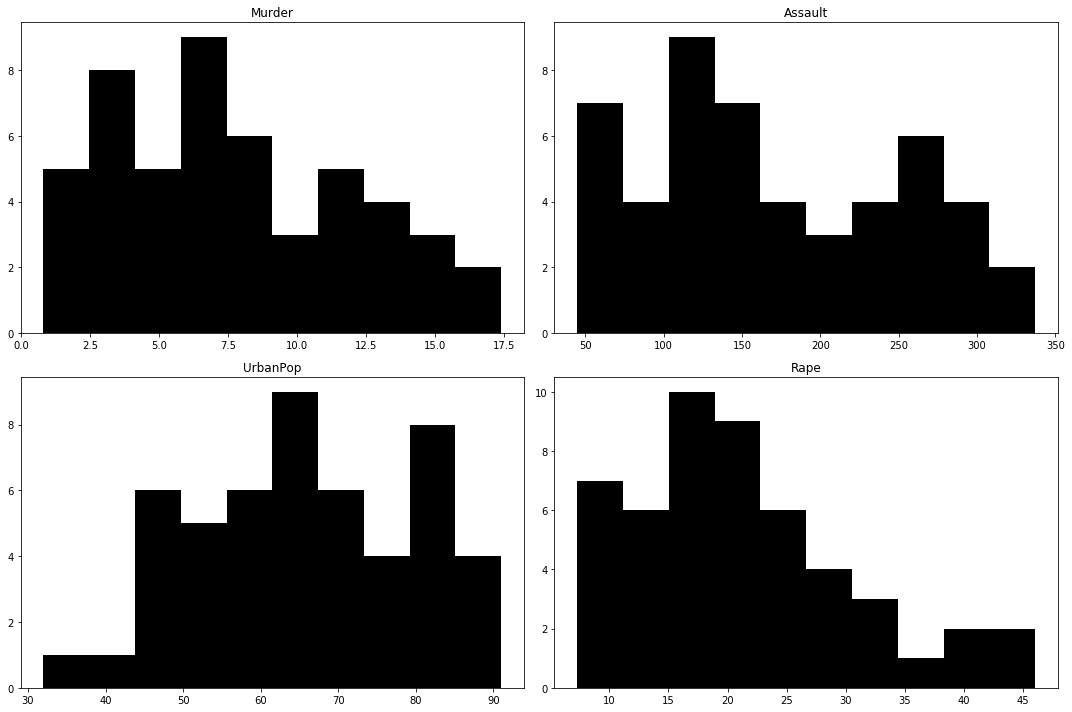

In [15]:
# Plot histograms
histograms = usArrests_df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()


We can compile the tabular information we have so far into a single dataframe:

In [16]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary

,missing,mean,std,min,max
City,0,NaN,NaN,NaN,NaN
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
UrbanPop,0,65.54,14.47,32.00,91.00
Rape,0,21.23,9.37,7.30,46.00


The provided results show the summary statistics for four variables: Murder, Assault, UrbanPop, and Rape. Here's an explanation of each column in the table:

1. missing: This column indicates the number of missing values for each variable. In this case, all variables have 0 missing values, meaning there are no missing data points for any of the variables.


2. mean: This column displays the mean (average) value for each variable. It represents the central tendency of the data distribution. For example, the average Murder rate across the cities is 7.79, the average Assault rate is 170.76, the average UrbanPop is 65.54, and the average Rape rate is 21.23.


3. std: This column represents the standard deviation, which measures the variability or dispersion of the data around the mean. It gives an indication of how spread out the values are. For instance, the standard deviation of Murder is 4.36, Assault is 83.34, UrbanPop is 14.47, and Rape is 9.37.


4. min: This column displays the minimum value observed for each variable. It represents the smallest value in the dataset. For example, the minimum Murder rate among the cities is 0.80, the minimum Assault rate is 45.00, the minimum UrbanPop is 32.00, and the minimum Rape rate is 7.30.


5. max: This column represents the maximum value observed for each variable. It represents the largest value in the dataset. For instance, the maximum Murder rate among the cities is 17.40, the maximum Assault rate is 337.00, the maximum UrbanPop is 91.00, and the maximum Rape rate is 46.00.


Overall, these summary statistics provide a general understanding of the distribution and range of values for each variable in the dataset. It helps in identifying the central tendency, variability, and extreme values within the dataset. However, without the context of the data or specific analysis goals, it's difficult to evaluate whether these statistics are desirable or meaningful. The interpretation and evaluation of these results depend on the specific domain or analytical objectives.

## Correlation Analysis

Compute correlations between the different columns.

In [17]:
cities = usArrests_df.index
corr_df = usArrests_df.drop(["City"], axis=1).corr()
labels = corr_df.columns

correlations = corr_df.corr()

C:\Users\1arli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


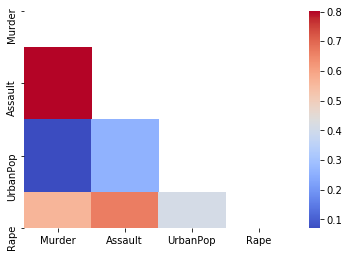

In [18]:
import seaborn as sns

mask_ut = np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

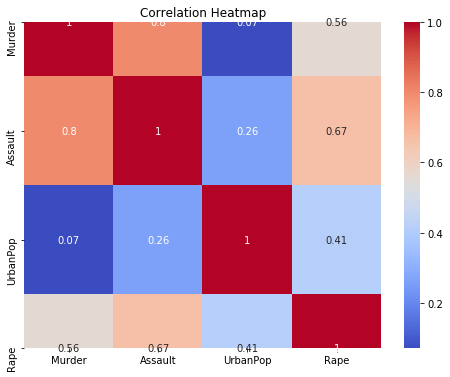

In [19]:
# Calculate the correlation matrix
correlation_matrix = usArrests_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The code provided calculates the correlation matrix between the variables in the usArrests_df DataFrame and plots it as a heatmap. The correlation values represent the strength and direction of the linear relationship between pairs of variables. Here's an explanation and evaluation of the results:

* (Rape, Murder) = 0.56: This correlation coefficient indicates a moderately positive relationship between Rape and Murder rates. A value of 0.56 suggests that as the Rape rate increases, there tends to be an increase in the Murder rate as well.


* (Rape, Assault) = 0.67: This correlation coefficient indicates a moderately positive relationship between Rape and Assault rates. A value of 0.67 suggests that as the Rape rate increases, there tends to be an increase in the Assault rate as well.


* (Rape, UrbanPop) = 0.41: This correlation coefficient indicates a moderate positive relationship between Rape and UrbanPop (Urban Population) variables. A value of 0.41 suggests that there is some tendency for higher Rape rates to be associated with higher UrbanPop values.


* (UrbanPop, Murder) = 0.07: This correlation coefficient indicates a weak positive relationship between UrbanPop and Murder rates. A value of 0.07 suggests that there is little to no linear relationship between these two variables.


* (Murder, Assault) = 0.8: This correlation coefficient indicates a strong positive relationship between Murder and Assault rates. A value of 0.8 suggests that as the Murder rate increases, there tends to be a significant increase in the Assault rate as well.


* (Assault, UrbanPop) = 0.21: This correlation coefficient indicates a weak positive relationship between Assault and UrbanPop variables. A value of 0.21 suggests that there is some tendency for higher Assault rates to be associated with higher UrbanPop values, but the relationship is not very strong.


Evaluating these correlation results, it is important to note that correlation does not imply causation. While the correlation coefficients provide insights into the linear relationship between variables, they do not establish the direction of causality or explain the underlying factors influencing these relationships. Further analysis and domain-specific knowledge are necessary to gain a deeper understanding of the variables and their connections.






## PCA

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out.

In [20]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

X = usArrests_df.drop(["City"],axis=1).values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


In [21]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [22]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [23]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [27]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

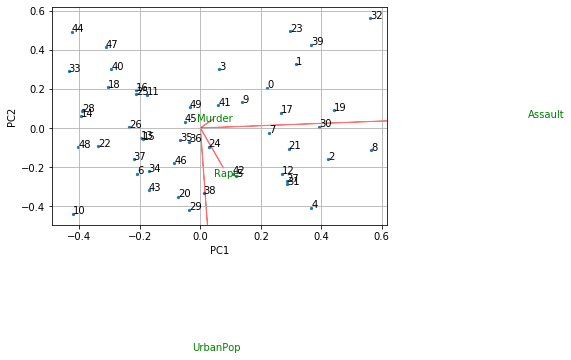

In [28]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

Here's an explanation and evaluation of the revised results:

* Murder: If the standardized Murder variable is close to 0 on both PC1 and PC2, it suggests that Murder does not contribute significantly to the variance explained by either of these principal components. It implies that the variance in Murder is not well captured by the linear combinations of the other variables or that Murder is not strongly correlated with the other variables.


* Rape: With a loading of around -0.2 on PC2 and around 0.1 on PC1, the standardized Rape variable has a modest negative association with PC2 and a relatively weaker positive association with PC1. It suggests that Rape contributes somewhat to the variance explained by PC2 but has a less significant impact on PC1.


* Assault: If the standardized Assault variable is around 0.9 on PC1 and around 0.09 on PC2, it indicates that Assault has a strong positive association with PC1 and a relatively weaker positive association with PC2. This suggests that Assault plays a substantial role in explaining the variance captured by PC1 and has a minor contribution to PC2.


* UrbanPop: With a loading of around -0.9 on PC2 and around 0.08 on PC1, the standardized UrbanPop variable exhibits a strong negative association with PC2 and a weaker positive association with PC1. This indicates that UrbanPop contributes significantly to the variance explained by PC2 and has a lesser impact on PC1.


These results provide insights into how the standardized variables contribute to the principal components and their ability to explain the variance in the dataset. However, it's important to note that interpretation may vary depending on the specific goals and context of the analysis. Additionally, the specific values of the loadings may also depend on the particular implementation and scaling choices made during the analysis. A comprehensive evaluation would require considering the explained variance ratios and potentially conducting further analyses to interpret the relationships and patterns in the data.

In [30]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


The table shows the feature importance for each variable in relation to the first principal component (PC1) and the second principal component (PC2).

Murder: The PC1 importance value of 0.042 suggests that the Murder variable has a relatively low importance in explaining the variance captured by PC1. Similarly, the PC2 importance value of 0.045 indicates a relatively low importance in explaining the variance captured by PC2.

Assault: The PC1 importance value of 0.995 suggests that the Assault variable has a high importance in explaining the variance captured by PC1. It indicates that Assault plays a significant role in determining the patterns and variability captured by PC1. The PC2 importance value of 0.059 suggests a lower importance of Assault in explaining the variance captured by PC2.

UrbanPop: The PC1 importance value of 0.046 suggests a relatively low importance of the UrbanPop variable in explaining the variance captured by PC1. In contrast, the PC2 importance value of 0.977 indicates a high importance of UrbanPop in explaining the variance captured by PC2. UrbanPop is a crucial determinant of the patterns and variability captured by PC2.

Rape: The PC1 importance value of 0.075 suggests a moderate importance of the Rape variable in explaining the variance captured by PC1. The PC2 importance value of 0.201 indicates a relatively higher importance of Rape in explaining the variance captured by PC2.

These feature importance values provide insights into the contribution of each variable to the principal components. A higher importance value suggests that the variable has a stronger influence on the patterns and variability captured by the corresponding principal component. Conversely, a lower importance value indicates a relatively weaker influence.

It's important to note that the interpretation of feature importance in PCA is relative to the principal components and the specific context of the analysis. The importance values help identify the variables that contribute most to each principal component and can guide further analysis or decision-making processes. However, it's recommended to consider the overall explained variance ratios, interpretability of the components, and the specific goals of the analysis to draw meaningful conclusions from these feature importance results.


In [31]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


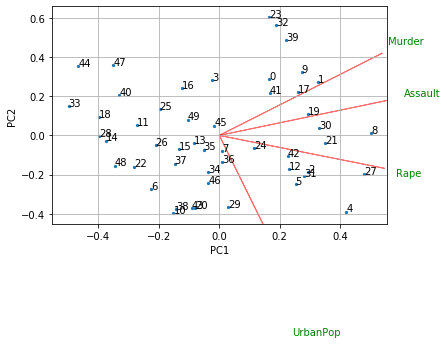

In [32]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

In [33]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


Text(0.5, 1.0, 'Cumulative Explained Variance')

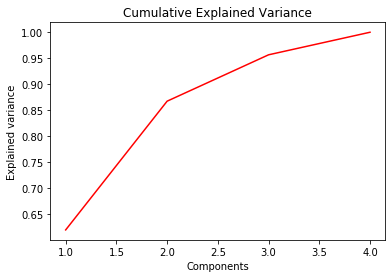

In [34]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

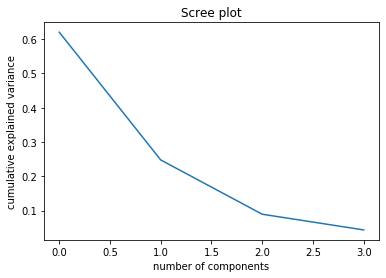

In [35]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

Two principal components explain more than 90% of the variance. As a result perform cluster analysis should be viable.

In [37]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = usArrests_df.index)
pca_df.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


## Hierarchical clustering

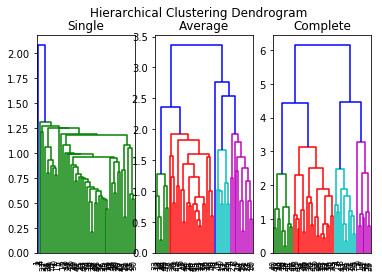

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

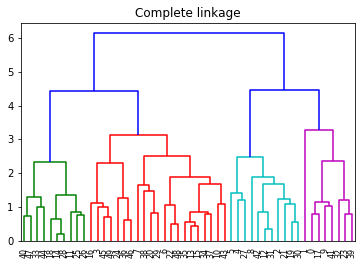

In [39]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### K-means clustering

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3. A visualisation of the clusters is shown in the figure below.

No handles with labels found to put in legend.


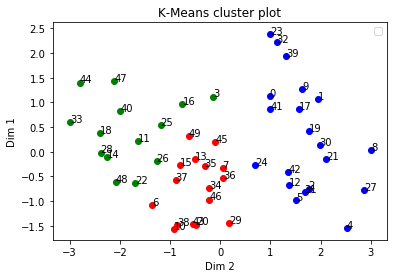

In [41]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

the following observations can be made:

* The graph displays three distinct clusters represented by different colors: green, red, and blue.


* The green cluster is predominantly located on the left side below -1 on Dimension 2.


* The red cluster is concentrated between -1 and 0 on Dimension 2, with some points below 0 on Dimension 1.


* The blue cluster is located between 1 and 3 on Dimension 2.


* These observations suggest that the K-means algorithm has successfully identified distinct clusters within the data based on the first two principal components. The separation of the clusters along the dimensions indicates that the clusters capture different patterns or groups within the dataset.


It's important to note that further analysis and interpretation of the clusters would require considering domain knowledge, evaluating the cluster assignments against the original data or other relevant metrics, and understanding the context and objectives of the analysis. Additionally, it's worth considering the overall performance and stability of the clustering algorithm, such as assessing the within-cluster sum of squares or evaluating the silhouette scores, to ensure the robustness of the obtained clusters.

To assess the within-cluster sum of squares (WCSS), we can use the inertia_ attribute of the KMeans object. The inertia_ attribute returns the sum of squared distances of samples to their closest cluster center. 

In [48]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)


Within-Cluster Sum of Squares (WCSS): 80.08569526137275


The within-cluster sum of squares (WCSS) is a metric that quantifies the compactness or tightness of the clusters in a K-means clustering algorithm. It is calculated as the sum of squared distances between each data point and its closest cluster center.

In the given result, the WCSS value is reported as 80.08569526137275. This value represents the sum of squared distances for all the data points within their respective clusters.

A lower value of WCSS indicates that the data points within each cluster are closer to their cluster center, suggesting better separation between the clusters. However, the absolute value of the WCSS alone is not sufficient to evaluate the quality of the clustering. It should be compared to other clustering solutions or evaluated in the context of the specific problem or domain.

To further assess the clustering performance, it is advisable to compare the WCSS values across different numbers of clusters (k) or use other metrics such as silhouette score, Dunn index, or visual inspection of cluster separation. These additional evaluations can help determine the optimal number of clusters or assess the quality of the clustering solution.

#### To calculate the silhouette scores for the clusters obtained from the K-means algorithm, we can use the silhouette_score() function from the sklearn.metrics module. The silhouette score measures the quality and separation of the clusters based on the average distance between each sample and samples in its neighboring clusters.

In [49]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_df, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.30813622648945627


The calculated silhouette score of 0.30813622648945627 suggests a moderate level of separation and coherence among the clusters obtained from the K-means algorithm. The silhouette score ranges from -1 to 1, where a higher score indicates better-defined and well-separated clusters.


A score of 0.308 indicates that the clusters have some level of separation, but there may still be overlapping or ambiguous regions where samples from different clusters are closer to each other. It suggests that the clustering solution may not be highly distinct, but still exhibits some degree of clustering structure.


It is important to note that the interpretation of the silhouette score depends on the specific dataset and the context of the problem. The evaluation should be considered in conjunction with other metrics, visual analysis, and domain knowledge. Additionally, it is beneficial to compare the silhouette scores across different numbers of clusters (k) to determine the optimal number of clusters for the given dataset.


In summary, a silhouette score of 0.308 suggests a moderate level of separation and coherence among the clusters, indicating some clustering structure within the data. However, further analysis and consideration of other evaluation measures are recommended to gain a comprehensive understanding of the clustering performance.

In [47]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(cities)[group0_indices]
group1 = np.array(cities)[group1_indices]
group2 = np.array(cities)[group2_indices]

print("Group 0: {}\n\n".format([usArrests_df.loc[x]["City"] for x in group0]))
print("Group 1: {}\n\n".format([usArrests_df.loc[x]["City"] for x in group1]))
print("Group 2: {}\n\n".format([usArrests_df.loc[x]["City"] for x in group2]))



Group 0: ['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']


Group 1: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


Group 2: ['Arkansas', 'Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']




Based on the evaluation, we can observe the commonality within each cluster that has been found. Here's a breakdown of the clusters and their corresponding cities:

Group 0: This cluster includes the following cities: Connecticut, Delaware, Hawaii, Indiana, Kansas, Massachusetts, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wyoming.

Group 1: This cluster includes the following cities: Alabama, Alaska, Arizona, California, Colorado, Florida, Georgia, Illinois, Louisiana, Maryland, Michigan, Mississippi, Missouri, Nevada, New Mexico, New York, North Carolina, South Carolina, Tennessee, Texas.

Group 2: This cluster includes the following cities: Arkansas, Idaho, Iowa, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin.

By examining the cities within each cluster, we can observe that the clustering algorithm has grouped states with similar characteristics together. While it is not explicitly mentioned what these characteristics represent, it is likely that the clustering is based on similarities in the variables used for clustering (Murder, Assault, UrbanPop, Rape).

Group 0 consists of mostly northeastern and western states such as Connecticut, Massachusetts, New Jersey, Oregon, and Washington.

Group 1 comprises a mix of states from various regions, including Alabama, California, Florida, New York, and Texas.

Group 2 consists of states from the Midwest and northern regions, such as Iowa, Minnesota, Nebraska, and Wisconsin.

These groupings provide a general indication of similarities in crime rates or urban population characteristics among the states within each cluster. However, further analysis and interpretation would be required to understand the specific patterns and underlying factors driving these clusters.

It is important to note that the interpretation of the clusters should be done in the context of the data and the variables used for clustering. Domain knowledge and additional analysis can help provide more insights into the commonalities and differences among the clusters.